In [25]:
import matplotlib.pyplot as plot
import geopandas as gpd
import earthpy as et
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/1976-2018-house2.csv", encoding="latin1")

In [3]:
# First 5 rows
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424


In [4]:
# Statistical metrics
data.describe()

,year,state_fips,state_cen,state_ic,district,candidatevotes,totalvotes,version
count,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.0
mean,1997.724322,28.732015,50.862397,37.025375,9.892462,64249.576798,206191.268559,20200424.0
std,12.512426,15.213433,26.326139,21.812798,9.991146,61442.185888,70158.576241,0.0
min,1976.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,20200424.0
25%,1988.000000,17.000000,23.000000,14.000000,3.000000,4277.500000,158643.000000,20200424.0
50%,1998.000000,31.000000,51.000000,36.000000,6.000000,55736.000000,201162.000000,20200424.0
75%,2008.000000,40.000000,74.000000,52.000000,13.000000,108338.750000,251238.000000,20200424.0
max,2018.000000,56.000000,95.000000,82.000000,53.000000,329800.000000,507831.000000,20200424.0


In [5]:
# What are the columns?
data.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'runoff', 'special', 'candidate',
       'party', 'writein', 'mode', 'candidatevotes', 'totalvotes',
       'unofficial', 'version'],
      dtype='object')

# Understanding the Data: Columns

year: year in which election was held

state: state name

description: state abbreviation

state_fips: numeric state code

state_cen: US census state code

state_ic: ICPSR state code

office: U.S. House (constant)

district: District number. At-large districts are coded as 0

stage: electoral stage ("gen" = general, "pri" = primary)

special: special election boolean (True = special election, False = regular election

candidate: name of candidate

party: party of candidate 

writein: boolean write in candidate (true = write-in, false = not write-in)

mode: mode of voting

candidatevotes: # of votes received by this candidate for this party

totalvates: total number of votes cast for this election

unofficial: boolean True/False (true = unofficial result)

version: date when this dataset was finalized

In [6]:
# Plot some distributions for 2018
data2018 = data[data["year"] == 2018]
data2018.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
28251,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Robert Kennedy Jr.,democrat,False,total,89226,242617,False,20200424
28252,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Bradley Byrne,republican,False,total,153228,242617,False,20200424
28253,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,NaN,NaN,True,total,163,242617,False,20200424
28254,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Martha Roby,republican,False,total,138879,226230,False,20200424
28255,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Tabitha Isner,democrat,False,total,86931,226230,False,20200424


In [7]:
data2018[data2018["party"] == "democrat"]

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
28251,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Robert Kennedy Jr.,democrat,False,total,89226,242617,False,20200424
28255,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Tabitha Isner,democrat,False,total,86931,226230,False,20200424
28258,2018,Alabama,AL,1,63,41,US House,3,gen,NaN,False,Mallory Hagan,democrat,False,total,83996,231915,False,20200424
28261,2018,Alabama,AL,1,63,41,US House,4,gen,NaN,False,Lee Auman,democrat,False,total,46492,230969,False,20200424
28264,2018,Alabama,AL,1,63,41,US House,5,gen,NaN,False,Peter Joffrion,democrat,False,total,101388,260673,False,20200424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29614,2018,Maryland,MD,24,52,52,US House,4,gen,NaN,False,Anthony G. Brown,democrat,False,total,209642,268583,False,20200424
29620,2018,Maryland,MD,24,52,52,US House,5,gen,NaN,False,Steny H. Hoyer,democrat,False,total,213796,304209,False,20200424
29624,2018,Maryland,MD,24,52,52,US House,6,gen,NaN,False,David Trone,democrat,False,total,163346,276974,False,20200424
29629,2018,Maryland,MD,24,52,52,US House,7,gen,NaN,False,Elijah Cummings,democrat,False,total,202345,264710,False,20200424


In [8]:
data2018Candidate = data2018[["party", "state", "candidatevotes"]]
data2018Candidate

,party,state,candidatevotes
28251,democrat,Alabama,89226
28252,republican,Alabama,153228
28253,NaN,Alabama,163
28254,republican,Alabama,138879
28255,democrat,Alabama,86931
...,...,...,...
29631,NaN,Maryland,272
29632,democrat,Maryland,217679
29633,libertarian,Maryland,4853
29634,republican,Maryland,96525


In [9]:
# Get two dataframes
# One for democrat votes, one for republican votes.
# Group them by state.
demOnly = np.array(data2018Candidate["party"] == "democrat")
repOnly = np.array(data2018Candidate["party"] == "republican")
demVotes = data2018Candidate[demOnly].groupby(["state"]).sum()
repVotes = data2018Candidate[repOnly].groupby(["state"]).sum()

In [10]:
# Rename columns to get ready to join our dataframes.
demVotes = demVotes.rename(columns={"candidatevotes": "demVotes"})
repVotes = repVotes.rename(columns={"candidatevotes": "repVotes"})

In [11]:
# Join, then select rows with NaNs 
# To see which states are missing votes from
# either party
votesDiff = demVotes.join(repVotes, how="outer")
votesDiff[votesDiff.isnull().any(axis=1)]

,demVotes,repVotes
state,,
Minnesota,NaN,1125533
North Dakota,NaN,193568


In [12]:
# Join on all states that have votes on both parties.
votesState = demVotes.join(repVotes, how="inner")
votesState

,demVotes,repVotes
state,,
Alabama,678687,975737
Alaska,131199,149779
Arizona,1179193,1139251
Arkansas,312978,556339
California,8010445,3973396
Colorado,1343211,1079772
Connecticut,808652,512495
Delaware,227353,125384
Florida,3307232,3675417


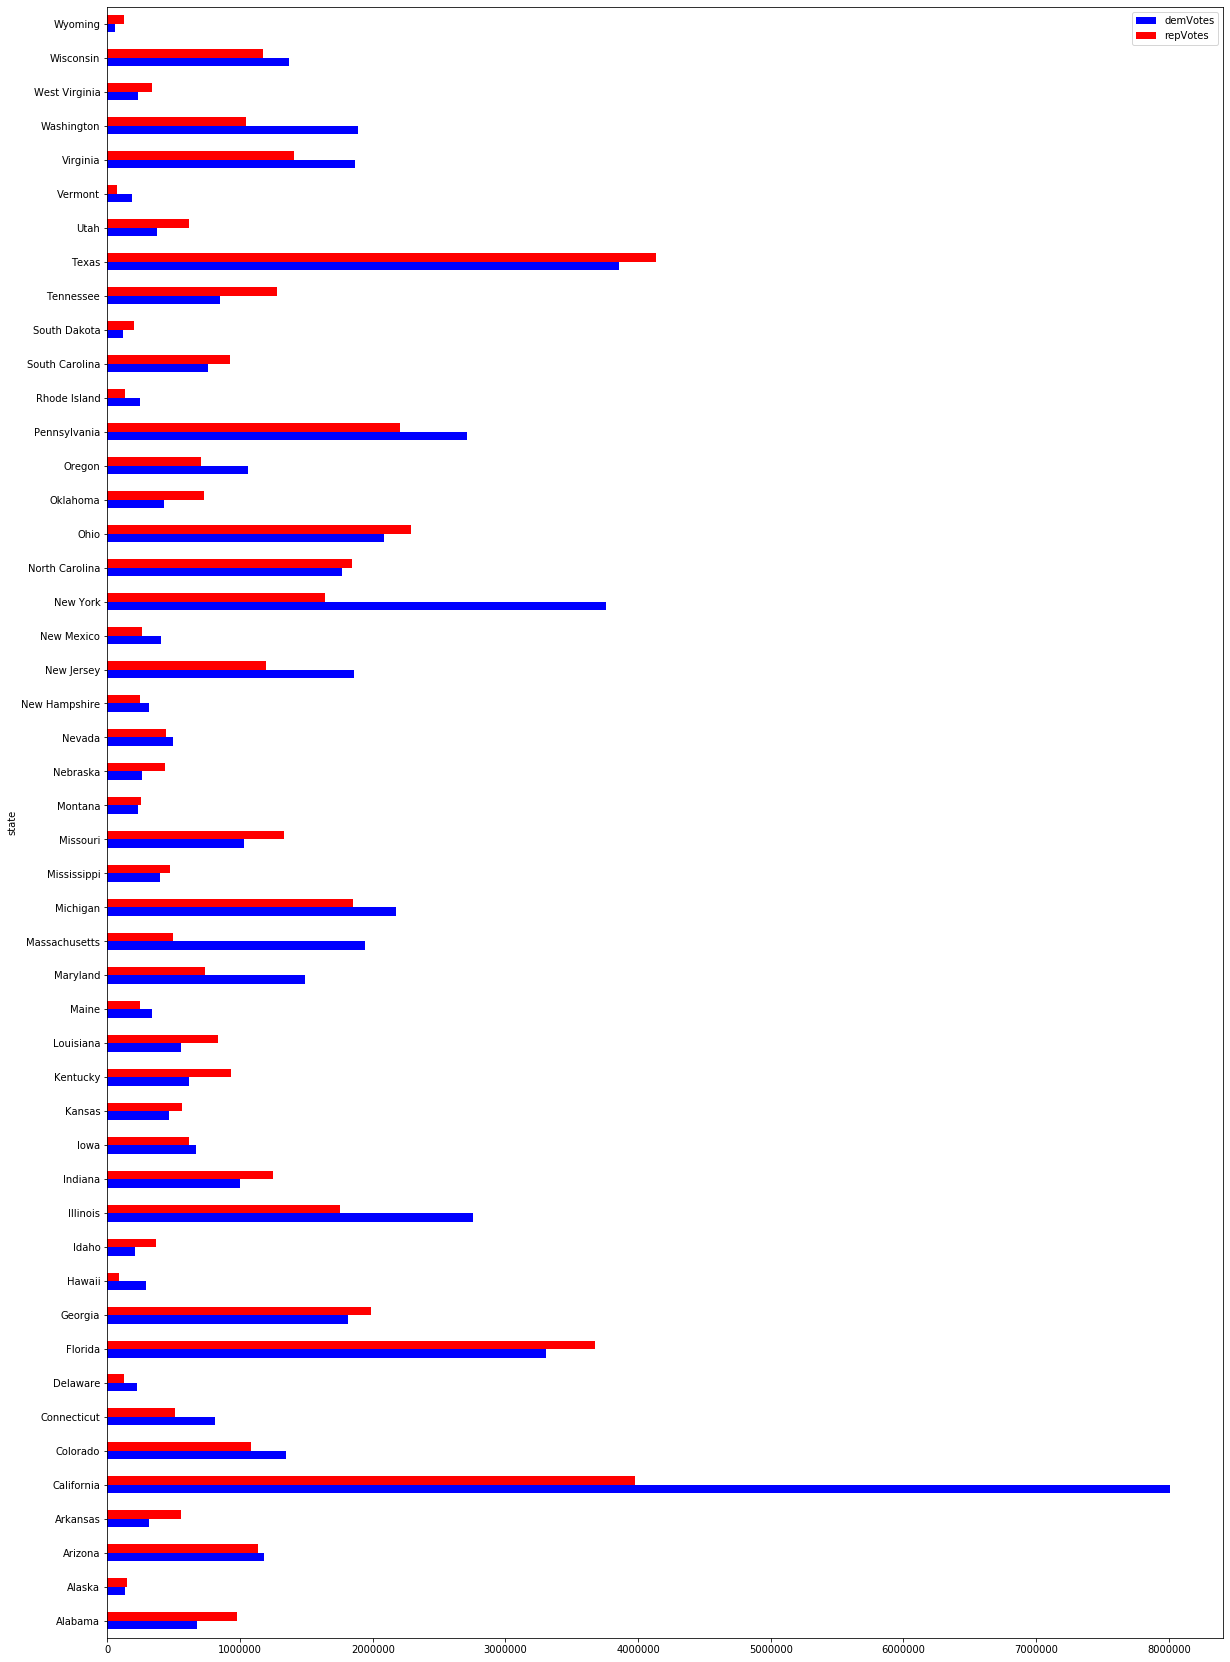

In [13]:
# Now plot a stacked bar chart.
votesState.plot.barh(figsize=(20, 30), color=["blue", "red"])

In [14]:
# Attributes by state
votesState.describe()

,demVotes,repVotes
count,4.800000e+01,4.800000e+01
mean,1.227487e+06,1.029863e+06
std,1.402223e+06,9.629009e+05
min,5.990300e+04,7.070500e+04
25%,3.125440e+05,3.602812e+05
50%,7.185135e+05,7.342185e+05
75%,1.825056e+06,1.292485e+06
max,8.010445e+06,4.135359e+06


In [15]:
# Group by district and list total republican and total republican votes.
# This is some duplicate code and work w/above cells - should consolidate.
# 2018 election data.
def groupDistricts(df, party):
    party_votes = data2018.loc[data["party"] == party]
    party_votes = party_votes.loc[:, ["state", "district", "candidatevotes"]]
    party_votes = party_votes.set_index(keys=["state", "district"])
    return party_votes
dem_votes = groupDistricts(data2018, "democrat")
rep_votes = groupDistricts(data2018, "republican")
dem_votes = dem_votes.rename(columns={"candidatevotes": "dem_votes"})
rep_votes = rep_votes.rename(columns={"candidatevotes": "rep_votes"})
vote_counts = dem_votes.join(rep_votes, how="outer")
vote_counts

dem_votes  rep_votes
state     district                      
Alabama   1           89226.0   153228.0
          2           86931.0   138879.0
          3           83996.0   147770.0
          4           46492.0   184255.0
          5          101388.0   159063.0
...                       ...        ...
Wisconsin 5          138385.0   225619.0
          6          144536.0   180311.0
          7          124307.0   194061.0
          8          119265.0   209410.0
Wyoming   0           59903.0   127963.0

[450 rows x 2 columns]

We have more republican house candidates winning than democratic candidates.

In [16]:
# Come up with the winners for the above dataframe.
vote_counts["winner"] = vote_counts["dem_votes"] >= vote_counts["rep_votes"]
vote_counts["winner"] = vote_counts["winner"].apply(lambda win_bool: "d" if win_bool else "r")

In [73]:
# Calculate the wasted votes for each district.

## Todo: Rewrite this in a way that uses vectorization
# And not inefficient looping.
def wasted_winner(total_votes_winner):
    return total_votes_winner - (total_votes_winner / 2)

dem_votes = vote_counts["dem_votes"]
rep_votes = vote_counts["rep_votes"]
rep_winner = np.array(vote_counts["winner"]) == "r"

wasted_votes_dem = np.zeros(len(rep_winner))
wasted_votes_rep = np.zeros(len(rep_winner))

for i in range(len(rep_winner)):
    if rep_winner[i]:
        wasted_votes_rep[i] = wasted_winner(rep_votes[i])
        wasted_votes_dem[i] = dem_votes[i]
    else:
        wasted_votes_dem[i] = wasted_winner(dem_votes[i])
        wasted_votes_rep[i] = rep_votes[i]
        
vote_counts["wasted_republican"] = wasted_votes_rep
vote_counts["wasted_democrat"] = wasted_votes_dem


C:\Users\dpale\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dpale\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [75]:
# Some races had no democrat or republican candidate.
# These can be seen in NaN columns.
# Drop these.
vote_counts = vote_counts.dropna()
vote_counts.head(50)

dem_votes  rep_votes winner  wasted_republican  \
state      district                                                   
Alabama    1           89226.0   153228.0      r            76614.0   
           2           86931.0   138879.0      r            69439.5   
           3           83996.0   147770.0      r            73885.0   
           4           46492.0   184255.0      r            92127.5   
           5          101388.0   159063.0      r            79531.5   
           6           85644.0   192542.0      r            96271.0   
Alaska     0          131199.0   149779.0      r            74889.5   
Arizona    1          143240.0   122784.0      d           122784.0   
           2          161000.0   133083.0      d           133083.0   
           3          114650.0    64868.0      d            64868.0   
           4           84521.0   188842.0      r            94421.0   
           5          127027.0   186037.0      r            93018.5   
           6          140559.0   173140.0      r            86570.0   
           8          135569.0   168835.0      r            84417.5   
           9          159583.0   101662.0      d           101662.0   
Arkansas   1           57907.0   138757.0      r            69378.5   
           2          116135.0   132125.0      r            66062.5   
           3           74952.0   148717.0      r            74358.5   
           4           63984.0   136740.0      r            68370.0   
California 1          131548.0   160046.0      r            80023.0   
           2          243081.0    72576.0      d            72576.0   
           3          134875.0    97376.0      d            97376.0   
           4          156253.0   184401.0      r            92200.5   
           7          155016.0   126601.0      d           126601.0   
           9          113414.0    87349.0      d            87349.0   
           10         115945.0   105955.0      d           105955.0   
           11         204369.0    71312.0      d            71312.0   
           12         275292.0    41780.0      d            41780.0   
           14         211384.0    55439.0      d            55439.0   
           15         177989.0    65940.0      d            65940.0   
           16          82266.0    60693.0      d            60693.0   
           17         159105.0    52057.0      d            52057.0   
           18         225142.0    77096.0      d            77096.0   
           19         162496.0    57823.0      d            57823.0   
           21          57239.0    56377.0      d            56377.0   
           22         105136.0   117243.0      r            58621.5   
           23          74661.0   131113.0      r            65556.5   
           24         166550.0   117881.0      d           117881.0   
           25         133209.0   111813.0      d           111813.0   
           26         158216.0    97210.0      d            97210.0   
           28         196662.0    54272.0      d            54272.0   
           29         124697.0    29995.0      d            29995.0   
           30         191573.0    69420.0      d            69420.0   
           31         110143.0    77352.0      d            77352.0   
           32         121759.0    55272.0      d            55272.0   
           33         219091.0    93769.0      d            93769.0   
           35         103420.0    45604.0      d            45604.0   
           36         122169.0    84839.0      d            84839.0   
           37         210555.0    25823.0      d            25823.0   
           38         139188.0    62968.0      d            62968.0   

                     wasted_democrat  
state      district                   
Alabama    1                 89226.0  
           2                 86931.0  
           3                 83996.0  
           4                 46492.0  
           5                101388.0  
           6                 85644.0  
Alaska     0    

In [76]:
# Come up with the winners for the above dataframe.
vote_counts["winner"].value_counts()

r    199
d    196
Name: winner, dtype: int64

In [77]:
vote_counts_bystate = vote_counts.groupby(by="state").sum()
vote_counts_bystate

,dem_votes,rep_votes,wasted_republican,wasted_democrat
state,,,,
Alabama,493677.0,975737.0,487868.5,493677.0
Alaska,131199.0,149779.0,74889.5,131199.0
Arizona,1066149.0,1139251.0,780824.0,776912.5
Arkansas,312978.0,556339.0,278169.5,312978.0
California,6608298.0,3802611.0,3373508.5,3651118.0
Colorado,1343211.0,1079772.0,789149.5,881014.5
Connecticut,808652.0,512495.0,512495.0,404326.0
Delaware,227353.0,125384.0,125384.0,113676.5
Florida,3104569.0,3675417.0,2301040.5,2446912.0


In [78]:
def get_efficiency_gap(dem_votes, rep_votes, wasted_dem, wasted_rep):
    return (wasted_dem - wasted_rep) / (dem_votes + rep_votes)

vote_counts_bystate["e_gap"] = get_efficiency_gap(vote_counts_bystate["dem_votes"], 
                                          vote_counts_bystate["rep_votes"],
                                          vote_counts_bystate["wasted_democrat"],
                                          vote_counts_bystate["wasted_republican"])

vote_counts_bystate.head(50)

,dem_votes,rep_votes,wasted_republican,wasted_democrat,e_gap
state,,,,,
Alabama,493677.0,975737.0,487868.5,493677.0,0.003953
Alaska,131199.0,149779.0,74889.5,131199.0,0.200405
Arizona,1066149.0,1139251.0,780824.0,776912.5,-0.001774
Arkansas,312978.0,556339.0,278169.5,312978.0,0.040041
California,6608298.0,3802611.0,3373508.5,3651118.0,0.026665
Colorado,1343211.0,1079772.0,789149.5,881014.5,0.037914
Connecticut,808652.0,512495.0,512495.0,404326.0,-0.081875
Delaware,227353.0,125384.0,125384.0,113676.5,-0.033190
Florida,3104569.0,3675417.0,2301040.5,2446912.0,0.021515


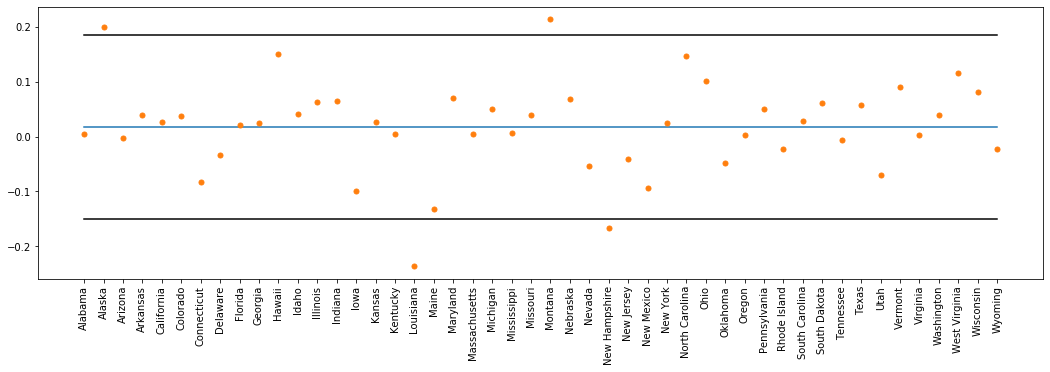

In [79]:
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.xticks(rotation=90)

average_e_gap = np.mean(vote_counts_bystate["e_gap"])
std_e_gap = np.std(vote_counts_bystate["e_gap"])
stateLength = len(vote_counts_bystate["e_gap"])


_ = plt.plot(np.arange(stateLength), [average_e_gap] * stateLength)
_ = plt.plot(np.arange(stateLength), [average_e_gap + 2 * std_e_gap] * stateLength, color="black")
_ = plt.plot(np.arange(stateLength), [average_e_gap - 2 * std_e_gap] * stateLength, color="black")
_ = plt.plot(vote_counts_bystate.reset_index()["state"], vote_counts_bystate["e_gap"], 
             linestyle="none",
            marker=".", markersize=10)

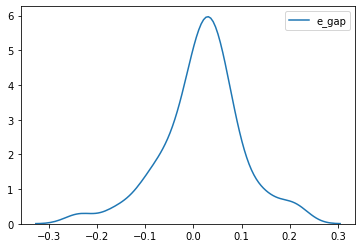

In [30]:
sns.kdeplot(vote_counts_bystate["e_gap"])

In [35]:
skew=vote_counts_bystate.skew()
skew

dem_votes            2.529912
rep_votes            1.683124
wasted_republican    2.018875
wasted_democrat      1.920744
e_gap               -0.399011
e_gap_normalized    -0.399011
dtype: float64

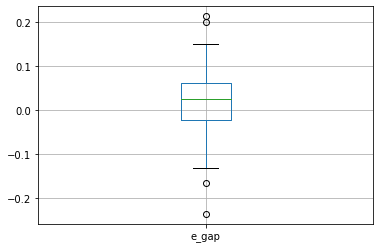

In [23]:
vote_counts_bystate.boxplot(column="e_gap")